
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
display(dbutils.fs.ls("/FileStore/shared_uploads/hhgarret@go.olemiss.edu/"))
display(dbutils.fs.ls("/FileStore/tables/"))

path,name,size,modificationTime
dbfs:/FileStore/shared_uploads/hhgarret@go.olemiss.edu/train.csv,train.csv,61194,1706626485000


path,name,size,modificationTime
dbfs:/FileStore/tables/Hello_World_Notebook.dbc,Hello_World_Notebook.dbc,3524,1706626101000


In [0]:
# File location and type
file_location = "/FileStore/shared_uploads/hhgarret@go.olemiss.edu/train.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df.head(10))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,null,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,null,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,null,S
6,0,3,"Moran, Mr. James",male,null,0,0,330877,8.4583,null,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,null,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,null,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,null,C


In [0]:
# Create a view or table

temp_table_name = "train_csv"

df.createOrReplaceTempView(temp_table_name)

80.0
Out[15]: <AxesSubplot:ylabel='Frequency'>

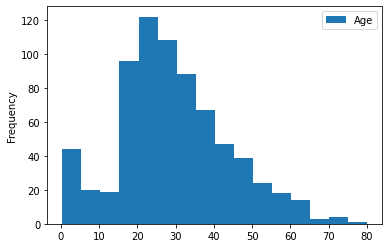

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, cast
maxage = df.na.drop(subset='Age').agg({"Age":"max"}).collect()[0][0] #don't consider any row with na values in age column
print(maxage)
df.na.drop(subset='Age').select("Age").toPandas().plot.hist(bins=(int(maxage/5))) #5 years per bin, so take maxage /5 , I.E., 80/5 = 16